In [50]:
import torch
import torch.nn as nn
from pathlib import Path
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
from math import *
from random import gauss,seed
import math

In [51]:
import matplotlib.pyplot as plt
import seaborn 

In [3]:
import sys 
sys.path.insert(0,'/home/mohit.kumargupta/deep_boltzmann')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import SVG
from deep_boltzmann.models import ParticleDimer


/home/mohit.kumargupta/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohit.kumargupta/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohit.kumargupta/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohit.kumargupta/.local/lib/python3.6/site-packages/ten

In [52]:
import mdtraj as md

In [53]:
trajdict = np.load('output.npz')
import ast
#params = ast.literal_eval(str(trajdict['params']))
traj_closed_train = trajdict['traj_closed_train_hungarian']
traj_open_train = trajdict['traj_open_train_hungarian']
traj_closed_test = trajdict['traj_closed_test_hungarian']
traj_open_test = trajdict['traj_open_test_hungarian']
x = np.vstack([traj_closed_train, traj_open_train])
xval = np.vstack([traj_closed_test, traj_open_test])

In [54]:
batch_size = 1000
train_set = np.vstack([traj_open_train[1000: :2], traj_closed_train[1000: :2] ] )

In [55]:
dataSet = []
j=0
sz = 32

In [56]:
boxes = []
x = -3.25
while x< 3.25:
        y = -3.25
        while(y<3.25):
            boxes.append([x+3.25/sz, y +3.25/sz])
            y+= (3.25*2)/sz   
        x += (3.25*2)/sz

In [57]:
boxes = np.array(boxes)

In [58]:
boxes = np.tile(boxes,(36,1,1))

In [59]:
boxes = torch.from_numpy(boxes)

In [61]:
boxes.shape

torch.Size([36, 1024, 2])

In [10]:
Snapshot = np.transpose( np.tile(np.reshape(train_set[0][4:],(36,2) ), (1024,1,1)), (1,0,2))

In [11]:
print(np.exp(1))

2.718281828459045


In [42]:
vol = (3.25*2/sz) **2
i=0

In [60]:
dataSet32 = []

In [49]:
for Snapshot in train_set:
    torch.reshape()
    snap = np.transpose( np.tile(np.reshape(Snapshot[4:],(36,2) ), (1024,1,1)), (1,0,2))
    dist = np.linalg.norm(snap-boxes,axis = 2)
    val =  vol * np.exp(-0.5*np.square(dist/0.5))/ (2*np.pi * 0.25)
    dataSet32.append(val.sum(axis=0))
    

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [45]:
dataSet32 = np.reshape(np.array(dataSet32), (len(dataSet32),sz,sz) )

In [23]:
np.save('NewDataSet32', dataSet32 ) 

In [28]:
dataSet32 = np.load('NewDataSet32.npy')

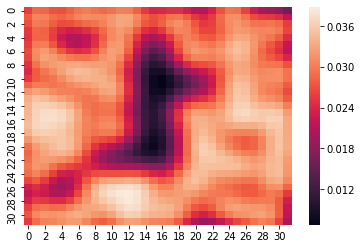

In [48]:
seaborn.heatmap(dataSet32[1000])

In [17]:
dataSet = np.load('../DataSet64.npy')

In [16]:
dataSet = np.reshape(dataSet,(80000,64,64))

In [25]:
dataSet3 = np.concatenate((dataSet2,dataSet),axis = 0)

In [18]:
print(dataSet.shape)

(80000, 64, 64)


In [14]:
np.save('../DataSet64',dataSet)

In [15]:
dataSet = np.array(dataSet)
dataSet.shape

(40001, 1024)

In [16]:
dataSet = dataSet.reshape((40001,32,32))

In [ ]:
np.save('DataSet32',dataSet[:40000].reshape((40000,32,32)))

In [5]:
TrajDirectory = "/home/mohit.kumargupta/confALA4/"
TrajFile = TrajDirectory +  "traj_comp.xtc"
TopFile = TrajDirectory + "ala4_amber_atA.gro"

In [6]:
def alnTetra(TrajFile, Topfile):
    xtObject = md.load(TrajFile, top = Topfile)
    return xtObject.xyz

In [7]:
mdObj = alnTetra(TrajFile, TopFile)
print(mdObj)

[[[1.1620001  0.88500005 2.3370001 ]
  [1.2360001  0.95300007 2.38      ]
  [1.2140001  1.052      2.3400002 ]
  ...
  [0.126      2.3630002  3.2530003 ]
  [0.039      2.3270001  3.2380002 ]
  [0.115      2.457      3.2410002 ]]

 [[1.1350001  1.0070001  2.334     ]
  [1.2270001  0.97300005 2.3820002 ]
  [1.296      1.056      2.365     ]
  ...
  [0.11100001 2.3530002  3.2480001 ]
  [0.062      2.308      3.1790001 ]
  [0.059      2.4310002  3.2680001 ]]

 [[1.164      1.075      2.365     ]
  [1.2320001  0.99200004 2.3850002 ]
  [1.33       1.018      2.345     ]
  ...
  [0.10300001 2.3490002  3.2310002 ]
  [0.054      2.3000002  3.1650002 ]
  [0.082      2.4410002  3.2150002 ]]

 ...

 [[0.887      2.927      0.81600004]
  [0.91600007 2.9290001  0.92100006]
  [0.943      2.8260002  0.94600004]
  ...
  [3.2630002  1.7360001  2.9280002 ]
  [3.262      1.756      3.022     ]
  [3.259      1.8220001  2.8860002 ]]

 [[0.88600004 2.927      0.83100003]
  [0.91600007 2.966      0.929     ]


In [8]:
print(mdObj[0][1])

[1.2360001  0.95300007 2.38      ]


In [9]:
trainingConfigs = mdObj[:10000].flatten().reshape((10000,10557))

In [10]:
print(trainingConfigs.shape)

(10000, 10557)


In [11]:
device = "cuda"

In [12]:
trainingConfigs = torch.from_numpy(trainingConfigs).to(device)

In [28]:
#RNADE
class RNADE(nn.Module):
    def __init__(self,protein_atoms,solvent_atoms):
        super(RNADE, self).__init__()
        self.protein_atoms = protein_atoms
        self.solvent_atoms = solvent_atoms
        self.total_dims = self.protein_atoms + self.solvent_atoms
        self.D = self.total_dims
        self.H = 128
        self.params = nn.ParameterDict({
            "V" : nn.Parameter(torch.randn(self.D, self.H)),
            "b" : nn.Parameter(torch.zeros(self.D)),
            "V2" : nn.Parameter(torch.randn(self.D, self.H)),
            "b2" : nn.Parameter(torch.zeros(self.D)),
            "W" : nn.Parameter(torch.randn(self.H, self.D)),
            "c" : nn.Parameter(torch.zeros(1, self.H)),
        })
        nn.init.xavier_normal_(self.params["V"])
        nn.init.xavier_normal_(self.params["V2"])
        nn.init.xavier_normal_(self.params["W"])
        
    def forward(self, x):
        ai = self.params["c"].expand(x.size(0), -1)   #B x H
        a1=[]
        m1 = []
        for d in range(self.D):
            if(d<self.protein_atoms):
                ai = x[:, d:d+1].mm(self.params["W"][:,d:d+1].t()) + ai
                continue
            h_i = torch.relu(ai) #B x H
            alpha1 = torch.sigmoid( h_i.mm(self.params["V"][d:d+1,:].t() ) + self.params["b"][d:d+1] )*2  + pow(10,-1)#  BxH *  Hx1  
            mean1 = h_i.mm(self.params["V2"][d:d+1,:].t() ) + self.params["b2"][d:d+1]
            a1.append(alpha1)
            m1.append(mean1)
            ai = x[:, d:d+1].mm(self.params["W"][:, d:d+1].t() ) + ai #Bx1 * 1xH =  BxH
        
        a1 = torch.cat(a1,1)
        m1 = torch.cat(m1,1)
        final_prob = torch.stack([m1,a1])       
     
        return final_prob

    def sample(self, x):
        ai = self.params["c"].expand(x.size(0), -1)
        means = []
        alphas = []
        boj = []
        sample = x
        for d in range(self.D):
            h_i = torch.relu(ai)
            if(d < self.protein_atoms):
                ai = sample[:, d:d+1].mm(self.params["W"][:,d:d+1].t()) + ai
                continue
            alpha = torch.sigmoid( h_i.mm(self.params["V"][d:d+1,:].t() ) + self.params["b"][d:d+1] )*2  + pow(10,-1) #  BxH *  Hx1  
            mean = h_i.mm(self.params["V2"][d:d+1,:].t() ) + self.params["b2"][d:d+1]
            means.append(mean)
            alphas.append(alpha)
            x1 = mean
            boj.append(x1)
            ai = x1.mm(self.params["W"][:, d:d+1].t() ) + ai
        boj = torch.cat(boj,1)
        print(boj)
        return boj

In [29]:
def otherLoss(output,pred):
    alpha = output[1, :,:]
    mean = output[0, :, :]
    print(mean.shape)
    loss = torch.exp( -0.5 *  ( (pred[:,42*3:]- mean)/alpha)**2  )/(alpha*sqrt(2*3.14) ) +pow(10,-10)
    print("Loss:")
    return -torch.log( loss ).sum(axis= 0).sum()/alpha.size()[0]

In [30]:
def lossFunct(output,pred,ind):
    alpha = output[1, :,4:]
    mean = output[0, :, 4:]
    loss = torch.exp( -0.5 *  ( (pred[:,4:]- mean)/alpha)**2  )/(alpha*sqrt(2*3.14) ) +pow(10,-10)
    print("Loss:")
    return -torch.log( loss ).sum(axis= 0)[ind]/alpha.size()[0]

In [36]:
batch_size = 256

In [37]:
train_loader = torch.utils.data.DataLoader(trainingConfigs, batch_size=batch_size, shuffle=True)

In [38]:
model = RNADE(42*3,trainingConfigs.shape[1]- 42*3).to(device)

In [39]:
model.load_state_dict(torch.load("/scratch/mohit.kumargupta/ProteinRNADE2"))
model.eval()

RNADE(
  (params): ParameterDict(
      (V): Parameter containing: [torch.cuda.FloatTensor of size 10557x128 (GPU 0)]
      (V2): Parameter containing: [torch.cuda.FloatTensor of size 10557x128 (GPU 0)]
      (W): Parameter containing: [torch.cuda.FloatTensor of size 128x10557 (GPU 0)]
      (b): Parameter containing: [torch.cuda.FloatTensor of size 10557 (GPU 0)]
      (b2): Parameter containing: [torch.cuda.FloatTensor of size 10557 (GPU 0)]
      (c): Parameter containing: [torch.cuda.FloatTensor of size 1x128 (GPU 0)]
  )
)

In [40]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(500):
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
            #print(data)
            optimizer.zero_grad()
            x_hat = model(data)
            print(x_hat[1][10])
            loss = otherLoss(x_hat, data)
            loss.backward()
            optimizer.step()
            print(loss.item())
            # print statistics
            running_loss += loss.item()
    torch.save(model.state_dict(), '/scratch/mohit.kumargupta/ProteinRNADE3')
    print("Running Loss is " + str(running_loss) )

0
tensor([0.1322, 0.2815, 0.1611,  ..., 0.7027, 0.5643, 0.8237], device='cuda:0',
       grad_fn=<SelectBackward>)
torch.Size([256, 10431])
Loss:
15978.3349609375
tensor([1.0348, 1.1023, 1.0588,  ..., 0.7030, 0.5645, 0.8240], device='cuda:0',
       grad_fn=<SelectBackward>)
torch.Size([256, 10431])
Loss:
14688.08203125
tensor([1.0363, 1.1047, 1.0597,  ..., 0.7035, 0.5647, 0.8244], device='cuda:0',
       grad_fn=<SelectBackward>)
torch.Size([256, 10431])
Loss:
14709.9404296875
tensor([1.0379, 1.1072, 1.0608,  ..., 0.7043, 0.5651, 0.8251], device='cuda:0',
       grad_fn=<SelectBackward>)
torch.Size([256, 10431])
Loss:
14642.662109375
tensor([1.0395, 1.1098, 1.0621,  ..., 0.7054, 0.5656, 0.8259], device='cuda:0',
       grad_fn=<SelectBackward>)
torch.Size([256, 10431])
Loss:
14630.6162109375
tensor([1.0410, 1.1125, 1.0636,  ..., 0.7066, 0.5662, 0.8269], device='cuda:0',
       grad_fn=<SelectBackward>)
torch.Size([256, 10431])
Loss:
14605.955078125
tensor([1.0426, 1.1152, 1.0653,  ...